Import packages

In [4]:
# TO USE FOR ENTIRE TEAM
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
# Processing the data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test
from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)
from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
from sklearn.svm import SVC 
# svc = SVC(kernel='linear')
from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)
from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)


# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report 
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)


from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import NearMiss 

In [6]:
# Pull in our original data and a copy for the base model
df = pd.read_csv('online_shoppers_intention.csv', na_values=r'-')
df_base = df.copy()

In [7]:
# Pipeline - Initial Imputation of Categorical Features:

## Replace the VisitorType 'Other' with the variable's mode, namely: 'Returning_Visitor'
df['VisitorType'] = df['VisitorType'].replace('Other','Returning_Visitor')
df.groupby('VisitorType').count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
VisitorType,,,,,,,,,,,,,,,,,
New_Visitor,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694
Returning_Visitor,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636


In [8]:
# Initial Log Transformation Continuous Features

impute1_list =['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']

# Impute Zeros before doing the log
for column in impute1_list:
    df[column] = df[column] + 1

display(df.sample(20))

# df['PageValues'] = df['PageValues'] + 1

df['PageValues_Log'] = np.log(df['PageValues'])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9602,1,1.000000,1,1.0,18,665.500000,1.000000,1.011765,1.000000,0.0,Nov,4,1,9,2,Returning_Visitor,False,False
7562,1,1.000000,1,1.0,26,702.883333,1.000000,1.023333,1.000000,0.0,Sep,2,2,1,2,Returning_Visitor,False,False
8624,1,1.000000,1,1.0,5,74.500000,1.000000,1.050000,1.000000,0.0,Nov,1,1,3,1,Returning_Visitor,False,False
11093,8,295.000000,1,1.0,8,640.000000,1.000000,1.018182,1.000000,0.0,Dec,2,4,9,10,Returning_Visitor,False,False
3888,9,158.000000,5,61.0,25,1193.500000,1.015152,1.033761,6.689554,0.0,May,2,2,1,7,Returning_Visitor,False,False
12100,6,86.250000,1,1.0,4,37.250000,1.000000,1.009524,1.000000,0.0,Nov,2,4,4,2,Returning_Visitor,False,False
1319,1,1.000000,1,1.0,4,97.500000,1.000000,1.022222,1.000000,0.0,Mar,1,1,1,3,Returning_Visitor,True,False
6735,1,1.000000,1,1.0,29,2103.750000,1.058929,1.078333,1.000000,0.0,Jul,3,2,3,13,Returning_Visitor,False,False
3297,2,27.000000,1,1.0,12,346.166667,1.022222,1.008889,1.000000,0.0,May,1,1,4,3,Returning_Visitor,False,False
7685,1,1.000000,1,1.0,4,16.200000,1.066667,1.133333,1.000000,0.0,Aug,2,4,1,1,Returning_Visitor,True,False


In [9]:
def holiday_bin_func(month) :
    if month == 'May':
        return int(1)
    elif month == 'Feb':
        return int(1)
    else:
        return int(0)
    
df['Holiday_Bin'] = df['Month'].apply(holiday_bin_func)

##Reduce months to the top 4 in which there are transactions and "other"
def month_bin_func(month) :
    if month == 'May':
        return int(5)
    elif month == 'Nov':
        return int(11)
    elif month == 'Mar':
        return int(3)
    elif month == 'Dec':
        return int(12)
    else:
        return int(0)
    
df['Month_Bin'] = df['Month'].apply(month_bin_func)


##Encode month names to numerical representations

def month_func(month) :
    if month == 'Jan':
        return int(1)
    elif month == 'Feb':
        return int(2)
    elif month == 'Mar':
        return int(3)
    elif month == 'Apr':
        return int(4)
    elif month == 'May':
        return int(5)
    elif month == 'June':
        return int(6)
    elif month == 'Jul':
        return int(7)
    elif month == 'Aug':
        return int(8)
    elif month == 'Sep':
        return int(9)
    elif month == 'Oct':
        return int(10)
    elif month == 'Nov':
        return int(11)
    elif month == 'Dec':
        return int(12)

df['Month'] = df['Month'].apply(month_func)

def month_quarterly_func(month) :
    if month <= 3:
        return int(1)
    elif month >= 4 and month <= 6:
        return int(2)
    elif month >= 7 and month <= 9:
        return int(3)
    elif month >= 10 and month <= 12:
        return int(4)

df['Quarter'] = df['Month'].apply(month_quarterly_func)

In [10]:
# Encode Revenue before splitting the data to allow for modeling

enc = LabelEncoder()

df['VisitorType'] = enc.fit_transform(df['VisitorType'])
df['Weekend'] = enc.fit_transform(df['Weekend'])
df['Revenue'] = enc.fit_transform(df['Revenue'])

In [11]:
#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Admin_per_Exit'] = df['Administrative'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_Bounce'] = df['Administrative'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_Exit'] = df['Administrative_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_Bounce'] = df['Administrative_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Info_per_Exit'] = df['Informational'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_per_Bounce'] = df['Informational'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_dur_per_Exit'] = df['Informational_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_dur_per_Bounce'] = df['Informational_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Product_per_Exit'] = df['ProductRelated'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_per_Bounce'] = df['ProductRelated'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_dur_per_Exit'] = df['ProductRelated_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_dur_per_Bounce'] = df['ProductRelated_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

#Create 'Bounce_Exit_Rate_Avg' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_Exit_Rate_Avg'] = (df['BounceRates'] + df['ExitRates'])/2
df['Bounce_Exit_Rate_Avg_PageVales'] = (df['Bounce_Exit_Rate_Avg'] / df['PageValues']) # add a chart to compare the trends and distributions
df['Bounce_per_Exit_Rate'] = df['BounceRates'] / df['ExitRates']


df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['Administrative_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['Informational_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['ProductRelated_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'


# df['Bounce_Exit_Rate_lin_combo2'] = ((df['ExitRates']*1) + (df['BounceRates']*2))
# df['Bounce_Exit_Rate_lin_combo3'] = ((df['ExitRates']*1) + (df['BounceRates']*3))
# df['Bounce_Exit_Rate_lin_combo4'] = ((df['ExitRates']*1) + (df['BounceRates']*4))
# df['Bounce_Exit_Rate_lin_combo5'] = ((df['ExitRates']*1) + (df['BounceRates']*5))

# df['Bounce_Exit_Rate_lin_combo7'] = ((df['BounceRates']*1) + (df['ExitRates']*2))
# df['Bounce_Exit_Rate_lin_combo8'] = ((df['BounceRates']*1) + (df['ExitRates']*3))
# df['Bounce_Exit_Rate_lin_combo9'] = ((df['BounceRates']*1) + (df['ExitRates']*4))
# df['Bounce_Exit_Rate_lin_combo10'] = ((df['BounceRates']*1) + (df['ExitRates']*5))

# df['Bounce_Exit_Rate_lin_combo11'] = ((df['BounceRates']*2) + (df['ExitRates']*2))
# df['Bounce_Exit_Rate_lin_combo12'] = ((df['BounceRates']*3) + (df['ExitRates']*3))
# df['Bounce_Exit_Rate_lin_combo13'] = ((df['BounceRates']*4) + (df['ExitRates']*4))
# df['Bounce_Exit_Rate_lin_combo14'] = ((df['BounceRates']*5) + (df['ExitRates']*5))



#Create 'Total_Duration' and 'Total_Duration_Avg' to enable us to assess total and average duration, respectively.
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Total_Duration_Avg'] = (df['Total_Duration'])/3
df['Admin_Duration_percent_TotalDuration'] = df['Administrative_Duration'] / df['Total_Duration']
df['Info_Duration_percent_TotalDuration'] = df['Informational_Duration'] / df['Total_Duration']
df['Product_Duration_percent_TotalDuration'] = df['ProductRelated_Duration'] / df['Total_Duration']
df['TotalDuration_per_PageValues'] = df['Total_Duration'] / df['PageValues']
df['TotalDuration_per_ExitRates'] = df['Total_Duration'] / df['ExitRates']
df['TotalDuration_per_BounceRates'] = df['Total_Duration'] / df['BounceRates']
df['TotalDuration_per_BounceExit_avg'] = df['Total_Duration'] / df['Bounce_Exit_Rate_Avg']
# df['TotalDuration_per_BounceExit_lin3'] = df['Total_Duration'] / df['Bounce_Exit_Rate_lin_combo3']
# df['TotalDuration_per_BounceExit_lin8'] = df['Total_Duration'] / df['Bounce_Exit_Rate_lin_combo8']
# df['TotalDuration_per_BounceExit_lin12'] = df['Total_Duration'] / df['Bounce_Exit_Rate_lin_combo12']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Admin_per_PageValues'] = df['Administrative'] / df['PageValues']
df['AdminDuration_per_PageValues'] = df['Administrative_Duration'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Informational_per_PageValues'] = df['Informational'] / df['PageValues']
df['Info_Duration_per_PageValues'] = df['Informational_Duration'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['ProductRelated_per_PageValues'] = df['ProductRelated'] / df['PageValues']
df['Product_Duration_per_PageValues'] = df['ProductRelated_Duration'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Exit_per_PageValues'] = df['ExitRates'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Bounce_per_PageValues'] = df['BounceRates'] / df['PageValues']

# calcualted_cols = ['Admin_per_Exit', 'Admin_per_Bounce', 'Bounce_Exit_Rate_Avg', 'Bounce_Exit_Rate_WeightedAvg', 'Bounce_per_Exit_Rate', 'Total_Duration','Total_Duration_Avg','Admin_Duration_percent_TotalDuration',\
#            'Info_Duration_percent_TotalDuration','Product_Duration_percent_TotalDuration','TotalDuration_per_PageValues', 'Admin_per_PageValues', 'AdminDuration_per_PageValues', 'Informational_per_PageValues',\
#            'Info_Duration_per_PageValues','ProductRelated_per_PageValues', 'Product_Duration_per_PageValues', 'Exit_per_PageValues', 'Bounce_per_PageValues','Revenue']

# display(df[calcualted_cols].sample(20))

In [12]:
# Correlation Heatmap for the data
df_calculated = df.iloc[:,-54:]
y = df.loc[:,'Revenue']

In [13]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'PageValues_Log', 'Holiday_Bin', 'Month_Bin',
       'Quarter', 'Admin_per_Exit', 'Admin_per_Bounce', 'Admin_dur_per_Exit',
       'Admin_dur_per_Bounce', 'Info_per_Exit', 'Info_per_Bounce',
       'Info_dur_per_Exit', 'Info_dur_per_Bounce', 'Product_per_Exit',
       'Product_per_Bounce', 'Product_dur_per_Exit', 'Product_dur_per_Bounce',
       'Bounce_Exit_Rate_Avg', 'Bounce_Exit_Rate_Avg_PageVales',
       'Bounce_per_Exit_Rate', 'Admin_per_bounce_exit_avg',
       'Admin_dur_per_bounce_exit_avg', 'Total_Duration', 'Total_Duration_Avg',
       'Admin_Duration_percent_TotalDuration',
       'Info_Duration_percent_TotalDuration',
       'Product_Duration_percent_To

In [14]:
df_calculated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 54 columns):
Informational                             12330 non-null int64
Informational_Duration                    12330 non-null float64
ProductRelated                            12330 non-null int64
ProductRelated_Duration                   12330 non-null float64
BounceRates                               12330 non-null float64
ExitRates                                 12330 non-null float64
PageValues                                12330 non-null float64
SpecialDay                                12330 non-null float64
Month                                     12330 non-null int64
OperatingSystems                          12330 non-null int64
Browser                                   12330 non-null int64
Region                                    12330 non-null int64
TrafficType                               12330 non-null int64
VisitorType                               12330 non-null int

In [15]:
x_cols =['SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'PageValues_Log', 'Holiday_Bin', 'Month_Bin',
       'Quarter', 'Admin_per_Exit', 'Admin_per_Bounce', 'Admin_dur_per_Exit',
       'Admin_dur_per_Bounce', 'Info_per_Exit', 'Info_per_Bounce',
       'Info_dur_per_Exit', 'Info_dur_per_Bounce', 'Product_per_Exit',
       'Product_per_Bounce', 'Product_dur_per_Exit', 'Product_dur_per_Bounce',
       'Bounce_Exit_Rate_Avg', 'Bounce_Exit_Rate_WeightedAvg',
       'Bounce_Exit_Rate_Avg_PageVales', 'Admin_per_bounce_exit_avg',
       'Admin_dur_per_bounce_exit_avg', 'Bounce_Exit_Rate_lin_combo2',
       'Bounce_Exit_Rate_lin_combo3', 'Bounce_Exit_Rate_lin_combo4',
       'Bounce_Exit_Rate_lin_combo5', 'Bounce_Exit_Rate_lin_combo7',
       'Bounce_Exit_Rate_lin_combo8', 'Bounce_Exit_Rate_lin_combo9',
       'Bounce_Exit_Rate_lin_combo10', 'Bounce_Exit_Rate_lin_combo11',
       'Bounce_Exit_Rate_lin_combo12', 'Bounce_Exit_Rate_lin_combo13',
       'Bounce_Exit_Rate_lin_combo14', 'Bounce_per_Exit_Rate',
       'Total_Duration', 'Total_Duration_Avg',
       'Admin_Duration_percent_TotalDuration',
       'Info_Duration_percent_TotalDuration',
       'Product_Duration_percent_TotalDuration',
       'TotalDuration_per_PageValues', 'TotalDuration_per_ExitRates',
       'TotalDuration_per_BounceRates', 'TotalDuration_per_BounceExit_avg',
       'TotalDuration_per_BounceExit_lin3',
       'TotalDuration_per_BounceExit_lin8',
       'TotalDuration_per_BounceExit_lin12', 'Admin_per_PageValues',
       'AdminDuration_per_PageValues', 'Informational_per_PageValues',
       'Info_Duration_per_PageValues', 'ProductRelated_per_PageValues',
       'Product_Duration_per_PageValues', 'Exit_per_PageValues',
       'Bounce_per_PageValues']

In [16]:
Calculated_Corr_df = pd.DataFrame(df_calculated.corrwith(y,method='spearman'))

In [17]:
Calculated_Corr_df.iloc[:,0].sort_values()

Informational_per_PageValues             -0.488708
Bounce_per_PageValues                    -0.477998
Exit_per_PageValues                      -0.476278
Bounce_Exit_Rate_Avg_PageVales           -0.475882
Admin_per_PageValues                     -0.392895
ProductRelated_per_PageValues            -0.320409
Info_Duration_per_PageValues             -0.294618
ExitRates                                -0.254488
Bounce_Exit_Rate_Avg                     -0.250266
TotalDuration_per_PageValues             -0.230799
Product_Duration_per_PageValues          -0.225622
BounceRates                              -0.148977
AdminDuration_per_PageValues             -0.111711
VisitorType                              -0.104136
Info_Duration_percent_TotalDuration      -0.098964
Holiday_Bin                              -0.089675
SpecialDay                               -0.086878
OperatingSystems                         -0.027330
Region                                   -0.014792
TrafficType                    

In [18]:
df[x_cols].max()

KeyError: "['Bounce_Exit_Rate_lin_combo5', 'Bounce_Exit_Rate_lin_combo8', 'TotalDuration_per_BounceExit_lin12', 'Bounce_Exit_Rate_lin_combo4', 'Bounce_Exit_Rate_lin_combo11', 'TotalDuration_per_BounceExit_lin8', 'Bounce_Exit_Rate_lin_combo10', 'Bounce_Exit_Rate_lin_combo2', 'TotalDuration_per_BounceExit_lin3', 'Bounce_Exit_Rate_lin_combo9', 'Bounce_Exit_Rate_lin_combo3', 'Bounce_Exit_Rate_lin_combo13', 'Bounce_Exit_Rate_lin_combo14', 'Bounce_Exit_Rate_lin_combo7', 'Bounce_Exit_Rate_lin_combo12', 'Bounce_Exit_Rate_WeightedAvg'] not in index"

In [23]:
researchers_best = ['PageValues','Month','ExitRates','Weekend','Informational_Duration','Region']

In [24]:
X = df[researchers_best]

In [25]:
from sklearn.preprocessing import quantile_transform
transformed_qt = quantile_transform(X,random_state=0,copy=True)
transformed_qt_df = pd.DataFrame(transformed_qt,columns = researchers_best)
X[researchers_best] = transformed_qt_df[researchers_best]

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
X.skew()

PageValues                1.365839
Month                     0.146433
ExitRates                 0.028881
Weekend                   1.265962
Informational_Duration    1.557548
Region                   -0.047509
dtype: float64

In [27]:
# process the attributes that have a range outside of zero to one (0 - 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scale = scaler.fit(X)
scaled = scaler.transform(X)
scaled_df = pd.DataFrame(scaled,columns = researchers_best)
X_scaled = scaled_df
# X[scale_cols] = scaled_df[scale_cols]

In [28]:
y = df.loc[:,'Revenue']

In [29]:
# resplit based on additional data prep completed post initial split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3,random_state=500) 

#### Feature Selection: Wrapper Forward Selection

In [30]:
# https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(list(initial_features))>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [20]:
best_features = forward_selection(X_train, y_train, significance_level=0.05)

NameError: name 'forward_selection' is not defined

In [49]:
best_features

['Bounce_per_PageValues',
 'PageValues_Log',
 'Bounce_Exit_Rate_lin_combo5',
 'Quarter',
 'AdminDuration_per_PageValues',
 'VisitorType',
 'Admin_dur_per_Bounce',
 'Month',
 'Holiday_Bin',
 'Info_Duration_per_PageValues',
 'Info_dur_per_Bounce',
 'Informational_per_PageValues',
 'ProductRelated_per_PageValues',
 'Admin_dur_per_Exit',
 'Bounce_per_Exit_Rate',
 'Month_Bin',
 'Admin_per_PageValues',
 'Admin_per_bounce_exit_avg',
 'Admin_per_Bounce',
 'Bounce_Exit_Rate_lin_combo8',
 'Admin_per_Exit',
 'Bounce_Exit_Rate_WeightedAvg']

#### Feature Selection: Lasso 

In [50]:
# https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784

from sklearn.linear_model import LassoCV

regr = LassoCV(cv=5, random_state=101,n_jobs =10 )
regr.fit(X_train, y_train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_test, y_test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0))) 

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12427598481485802, tolerance: 0.09315640839971039

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4885673419826162, tolerance: 0.09315640839971039



LassoCV Best Alpha Scored:  8.407863809313873e-05
LassoCV Model Accuracy:  0.4237610039534939
Variables Eliminated:  28
Variables Kept:  34


Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

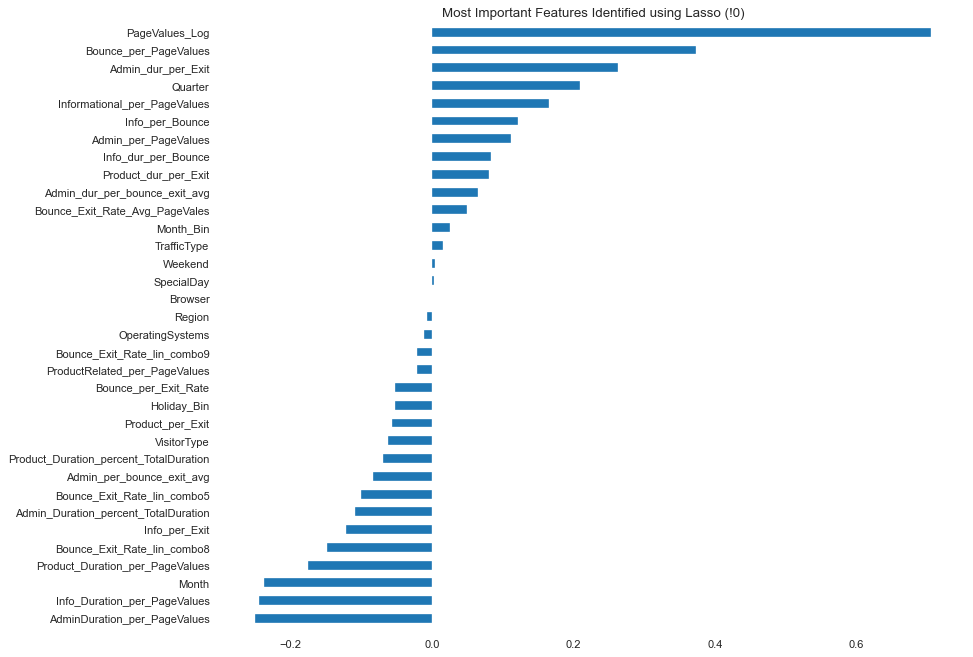

In [51]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values() # possible sort by index
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")

In [52]:
top_coef_df =pd.DataFrame(top_coef)
lasso_best =top_coef_df.tail(15).index.tolist()

In [31]:
X_train, X_test =  X_train.loc[:,researchers_best], X_test.loc[:,researchers_best]

In [32]:
X_train.describe()

,PageValues,Month,ExitRates,Weekend,Informational_Duration,Region
count,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000
mean,0.197518,0.510603,0.503746,0.228247,0.176447,0.427426
std,0.371130,0.297130,0.292802,0.419727,0.358983,0.365544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.305806,0.253253,0.000000,0.000000,0.000000
50%,0.000000,0.483483,0.502503,0.000000,0.000000,0.577077
75%,0.000000,0.738739,0.758258,0.000000,0.000000,0.722723
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Part IV: Data Analysis/Modeling <a name="part4"></a>

## A. Naive Bayes Model (NB)
>   <b> Accuracy: </b> 87%
<br><b> AUC: </b> 87%
<br><b> Next Steps: </b> Additional parameter tuning

###0. Step 0: Import Needed Packages

In [33]:
# import the metrics class
from sklearn import metrics
# from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# import other required modules for confusion matrices
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [34]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

In [35]:
# Code for feature selection using scikit-learn

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,max_depth=2, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

0    0.517430
2    0.270446
1    0.147503
4    0.061258
5    0.001928
3    0.001435
dtype: float64

###1. Step 1: Specify the Model

###2. Steps 2-4: Generate Test Data, Build the Models & Assess the Models for y2

y Accuracy: 0.8745606920789403

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3158
           1       0.55      0.82      0.66       541

    accuracy                           0.87      3699
   macro avg       0.76      0.85      0.79      3699
weighted avg       0.90      0.87      0.88      3699



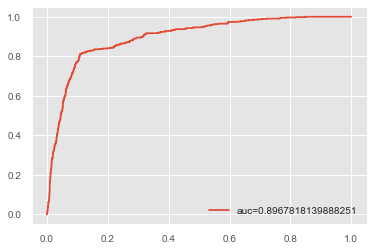

Text(0.5, 257.44, 'Predicted label')

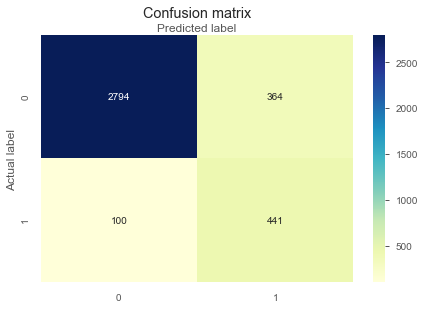

In [36]:
#Train the model using the training sets - for y2 (Sale)
gnb.fit(X_train, y_train)

#Predict the response for test dataset for y2
y_NB_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
# Accuracy for y2
print("y Accuracy:",metrics.accuracy_score(y_test, y_NB_pred))
print("")

#Can use classification report to assess model adequacy, too
class_names=[0,1] # name  of classes
print(metrics.classification_report(y_test, y_NB_pred, labels=class_names))

#AUC for y
y_NB_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_NB_pred_proba)
auc = metrics.roc_auc_score(y_test, y_NB_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_NB_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [37]:
#Conclusion - With accuracy of 81% for each y1 and y2, the Naive Bayes model is superior to the base model which had an accuracy of 71% for each target.
#However, there is still room for improvement.

In [38]:
# MD's Modeling Work

## B. Decision Tree Model (DT)
>   <b> Accuracy: </b> 85%
<br><b> AUC: </b> 69%
<br><b> Next Steps: </b> Additional parameter tuning

#### Specify the Model

In [39]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#### Build the Model

In [40]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_DT_pred = clf.predict(X_test)

In [41]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_DT_pred))

Accuracy: 0.862124898621249


#### Assess the Model

In [42]:
# Evaluating the Classification Report
print(metrics.classification_report(y_test, y_DT_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3158
           1       0.53      0.54      0.53       541

    accuracy                           0.86      3699
   macro avg       0.72      0.73      0.73      3699
weighted avg       0.86      0.86      0.86      3699



In [43]:
# Evaluating the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_DT_pred))

[[2897  261]
 [ 249  292]]


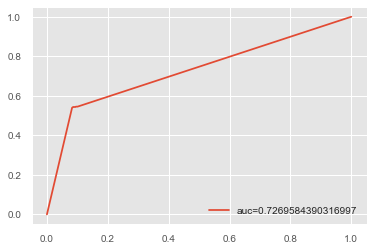

Text(0.5, 257.44, 'Predicted label')

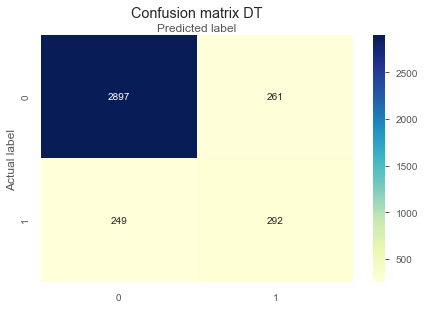

In [44]:
#AUC for y
y_DT_pred_proba = clf.predict_proba(X_test)[::,1]
fpr_DT, tpr_DT, _ = metrics.roc_curve(y_test,  y_DT_pred_proba)
auc_DT = metrics.roc_auc_score(y_test, y_DT_pred_proba)
plt.plot(fpr_DT,tpr_DT,label="auc="+str(auc_DT))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_DT = metrics.confusion_matrix(y_test, y_DT_pred)
cnf_matrix_DT
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DT), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

85.45% is much better than the baseline model of 70%

#### *** Attempted Model Optimization - Not 100% if I optimized these correctly

##### y2 (Sale)

In [45]:
# Trying to optimize Decision Tree Model by adding in the parameters "entropy" (information gain selection measure) and "max depth=3"
# # Did this in order to reduce to complexity of the Decision Tree, in hopes that it will yield better results
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion = "entropy", max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_DT_pred2 = clf2.predict(X_test)

In [46]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_DT_pred2))

Accuracy: 0.8924033522573669


In [47]:
# Evaluating the Classification Report
print(metrics.classification_report(y_test, y_DT_pred2))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3158
           1       0.62      0.67      0.65       541

    accuracy                           0.89      3699
   macro avg       0.78      0.80      0.79      3699
weighted avg       0.90      0.89      0.89      3699



[[2939  219]
 [ 179  362]]


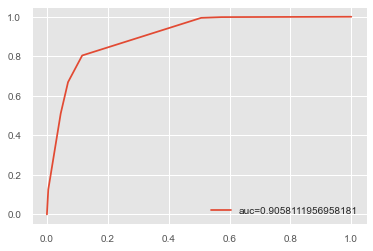

Text(0.5, 257.44, 'Predicted label')

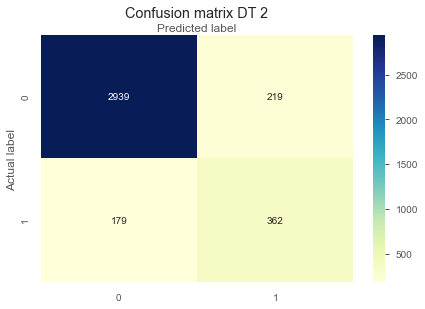

In [48]:
# Evaluating the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_DT_pred2))

#AUC for y
y_DT_pred_proba2 = clf2.predict_proba(X_test)[::,1]
fpr_DT2, tpr_DT2, _ = metrics.roc_curve(y_test,  y_DT_pred_proba2)
auc_DT2 = metrics.roc_auc_score(y_test, y_DT_pred_proba2)
plt.plot(fpr_DT2,tpr_DT2,label="auc="+str(auc_DT2))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_DT2 = metrics.confusion_matrix(y_test, y_DT_pred2)
cnf_matrix_DT2
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DT2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT 2', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### Not sure if the optimized model is overfitting, but 89.53% accuracy is better than the base Decision Tree Models

In [49]:
# # Code for feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [50]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_test).sort_values(ascending=False)
# feature_imp

## C. Random Forest Model (RF)
>   <b> Accuracy: </b> 89%
<br><b> AUC: </b> 87%
<br><b> Next Steps: </b> Additional parameter tuning

#### Specify the Model

In [51]:
# Building a Classifier
#Import scikit-learn dataset library
from sklearn import datasets

#### Build Model for y2 (Sale)

In [52]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

y_RF_pred = rfc.predict(X_test)

In [53]:
# Evaluation of the Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_RF_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3158
           1       0.62      0.57      0.59       541

    accuracy                           0.89      3699
   macro avg       0.77      0.76      0.76      3699
weighted avg       0.88      0.89      0.88      3699



[[2967  191]
 [ 232  309]]


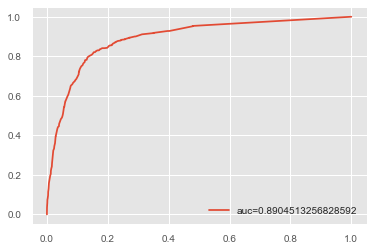

Text(0.5, 257.44, 'Predicted label')

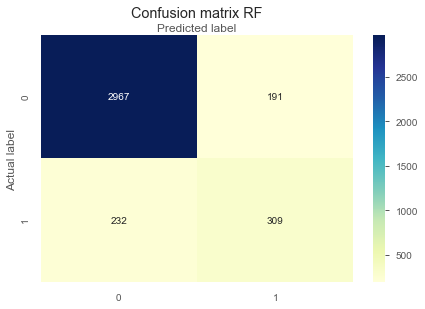

In [54]:
# Evaluation of the Confusion Matrix
print(confusion_matrix(y_test, y_RF_pred))

#AUC for y
y_RF_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_test,  y_RF_pred_proba)
auc_RF = metrics.roc_auc_score(y_test, y_RF_pred_proba)
plt.plot(fpr_RF,tpr_RF,label="auc="+str(auc_RF))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_RF = metrics.confusion_matrix(y_test, y_RF_pred)
cnf_matrix_RF
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### 90% accuracy for both Random Forest Models, so far better than the Decision Tree Models

In [55]:
# # Attempt on the feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [56]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_test).sort_values(ascending=False)
# feature_imp

## D. Support Vector Machines (SVM) Classification Model (SVC)
>   <b> Accuracy: </b> 88%
<br><b> AUC: </b> 85%
<br><b> Next Steps: </b> SVC ensemble classifiers 

In [57]:
###1. Step 1: Specify the Model
from sklearn import svm
svc = svm.SVC(kernel='rbf',cache_size=7000,gamma= 'auto', C=5, probability =True, degree = 5) # gamma= 0.001 , kernel='poly', 'rbf',‘linear’

In [58]:
###2. Step 2: Generate Test Data
# X_train_svc, X_test_svc, y1_train_svc, y1_test_svc, y2_train_svc, y2_test_svc = train_test_split(X, y1,y2, test_size=0.3,random_state=1000) 
# X_train, X_test, y1_Models_train, y1_Models_test, y2_Models_train, y2_Models_test
#Standard Scale the data to allow for better SVC model performance
# scaler = StandardScaler().fit(X_train) 
# standardized_X_svc = scaler.transform(X_train) 
# standardized_X_test_svc = scaler.transform(X_test)

In [59]:
###3. Step 3: Build the Model
#Train the model using the training sets
svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svc = svc.predict(X_test)

Accuracy_svc: 0.8794268721276021
[[2944  214]
 [ 232  309]]


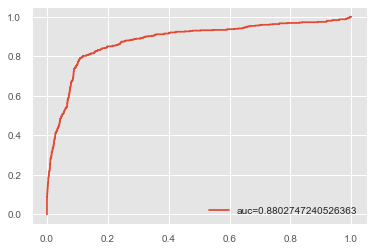


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3158
           1       0.59      0.57      0.58       541

    accuracy                           0.88      3699
   macro avg       0.76      0.75      0.76      3699
weighted avg       0.88      0.88      0.88      3699

Accuracy_svc: 0.8794268721276021


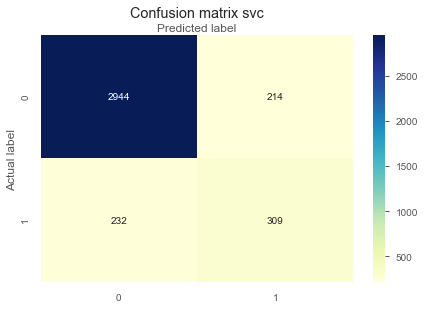

In [60]:
###4. Step 4: Assess the Model
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_svc))
cnf_matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc)

print(cnf_matrix_svc)


#AUC for y1
y_SVM_pred_proba = svc.predict_proba(X_test)[::,1]
fpr_SVM, tpr_SVM, _ = metrics.roc_curve(y_test,  y_SVM_pred_proba)
auc_SVM = metrics.roc_auc_score(y_test, y_SVM_pred_proba)
plt.plot(fpr_SVM,tpr_SVM,label="auc="+str(auc_SVM))
plt.legend(loc=4)
plt.show()
print("")

class_names_svc=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_svc = np.arange(len(class_names_svc))
plt.xticks(tick_marks_svc, class_names_svc)
plt.yticks(tick_marks_svc, class_names_svc)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix svc', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred_svc))
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_svc))

In [61]:
# # Code for feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [62]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_test).sort_values(ascending=False)
# feature_imp

## E. XGBoost Model (XGB)
>   <b> Accuracy: </b> 89%
<br><b> AUC: </b> 89%
<br><b> RMSE: </b> .32
<br><b> Next Steps: </b> Additional parameter tuning


###0. Step 0: Import Needed Packages

In [63]:
#Import Needed Packages
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

#Do preliminary work


###1. Step 1: Specify the Model

In [64]:
#Instantiate an XGBoost Classifer Model - for y1 (No_Sale)
XGB_class = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)


###2. Steps 2-4: Generate Test Data, Build the Models & Assess the Models for y2 (Sale)

In [65]:
#Put Data into structure for XGBoost- for y2 (Sale) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

#Train the model using the training sets for y1
XGB_class.fit(X_train, y_train)

#Predict the response for test dataset for y1
y_XGB_pred = XGB_class.predict(X_test)

#Calculate RMSE for y2
rmse_XGB = np.sqrt(mean_squared_error(y_test, y_XGB_pred))
print("XGBoost's RMSE for y2 is: %f" % (rmse_XGB))

#Create error ratio to evaluate results for y2
target_range_XGB = y.max() - y.min()
print("XGB target range is: %f" % (target_range_XGB))
error_ratio_XGB = rmse_XGB/target_range_XGB
print("XGBoost's Error Ratio for y2 is: %f" % (error_ratio_XGB))

XGBoost's RMSE for y2 is: 0.328019
XGB target range is: 1.000000
XGBoost's Error Ratio for y2 is: 0.328019


C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\xgboost\core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



In [66]:
#ISSUE WITH THE ABOVE - HOW COME THE TARGET RANGE IS 1? DOES IT HAVE TO DO WITH 0/1 STATUS OF TARGET VARIABLE???

y Accuracy: 0.8924033522573669

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.65      0.58      0.61       541

    accuracy                           0.89      3699
   macro avg       0.79      0.76      0.77      3699
weighted avg       0.89      0.89      0.89      3699



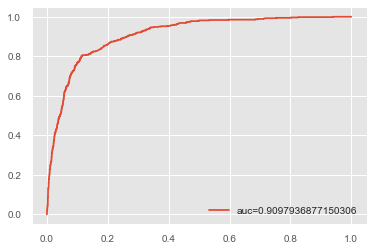

Text(0.5, 257.44, 'Predicted label')

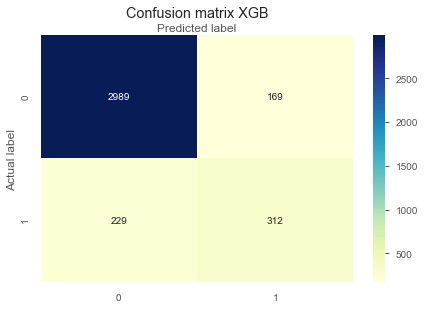

In [67]:
# Model Accuracy, how often is the classifier correct?
# Accuracy for y2
print("y Accuracy:",metrics.accuracy_score(y_test, y_XGB_pred))
print("")


#Can use classification report to assess model adequacy, too
print(metrics.classification_report(y_test, y_XGB_pred, labels=class_names))

#AUC for y1
y_XGB_pred_proba = XGB_class.predict_proba(X_test)[::,1]
fpr_XGB, tpr_XGB, _ = metrics.roc_curve(y_test,  y_XGB_pred_proba)
auc_XGB = metrics.roc_auc_score(y_test, y_XGB_pred_proba)
plt.plot(fpr_XGB,tpr_XGB,label="auc="+str(auc_XGB))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_XGB = metrics.confusion_matrix(y_test, y_XGB_pred)
cnf_matrix_XGB
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_XGB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix XGB', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
# # Code for feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [69]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_test).sort_values(ascending=False)
# feature_imp

## F. Neural Network Model (NN)
>   <b> Accuracy: </b> 89%
<br><b> AUC: </b> 90%
<br><b> Next Steps: </b> Additional parameter tuning

In [70]:
# X_train, X_test, y1_Models_train, y1_Models_test, y2_Models_train, y2_Models_test


###1. Step 1: Specify the Model
# Import the model
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
# mlp = MLPClassifier(hidden_layer_sizes = (3,1),solver='sgd',learning_rate_init= 0.01, max_iter=50)
mlp= MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9, 
beta_2=0.999, early_stopping=False, epsilon=1e-08,       
hidden_layer_sizes=(7,3), learning_rate='adaptive',      
learning_rate_init=0.01, max_iter=10000, momentum=0.9,       
nesterovs_momentum=True, power_t=0.5, random_state=1000,       
shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,       
verbose=False, warm_start=True)

In [71]:
###2. Step 2: Generate Test Data
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 3), learning_rate='adaptive',
              learning_rate_init=0.01, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1000, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=True)

In [72]:
###3. Step 3: Build the Model
y_pred_nn = mlp.predict(X_test)


MLP score is 0.8961881589618816
Accuracy_nn: 0.8961881589618816
[[2978  180]
 [ 204  337]]


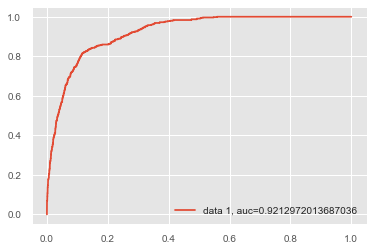

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3158
           1       0.65      0.62      0.64       541

    accuracy                           0.90      3699
   macro avg       0.79      0.78      0.79      3699
weighted avg       0.89      0.90      0.90      3699

Accuracy_svc: 0.8961881589618816


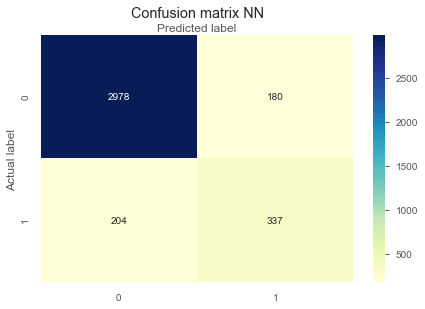

In [73]:
###4. Step 4: Assess the Model
# Score takes a feature matrix X_test and the expected target values y_test. 
# Predictions for X_test are compared with y_test

print("MLP score is",mlp.score(X_test,y_test))

# Accuracy for y NN
#print("y Accuracy NN:",metrics.accuracy_score(y_test, y_XGB_pred))
#print("")

###4. Step 4: Assess the Model
print("Accuracy_nn:",metrics.accuracy_score(y_test, y_pred_nn))
cnf_matrix_nn = metrics.confusion_matrix(y_test, y_pred_nn)

print(cnf_matrix_nn)

# Plot AOC
y_pred_proba_nn = mlp.predict_proba(X_test)[::,1]
fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
plt.legend(loc=4)
plt.show()


class_names_nn=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_nn = np.arange(len(class_names_nn))
plt.xticks(tick_marks_nn, class_names_nn)
plt.yticks(tick_marks_nn, class_names_nn)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix NN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred_nn))
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_nn))

#Plot AOC
# y_pred_proba_nn = mlp.predict_proba(X_test)[::,1]
# fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
# auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
# plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
# plt.legend(loc=4)
# plt.show()

In [74]:
# # Code for feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [75]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_test).sort_values(ascending=False)
# feature_imp

## Logistic Regression Model

>   <b> Accuracy: </b> 89%
<br><b> AUC: </b> 87%
<br><b> Next Steps: </b> Additional parameter tuning


In [76]:
#Build the model
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_LR_pred=logreg.predict(X_test)

In [77]:
# import the metrics class for the Confusion Matrix
from sklearn import metrics
cnf_matrix_LogR = metrics.confusion_matrix(y_test, y_LR_pred)
cnf_matrix_LogR

array([[2948,  210],
       [ 190,  351]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

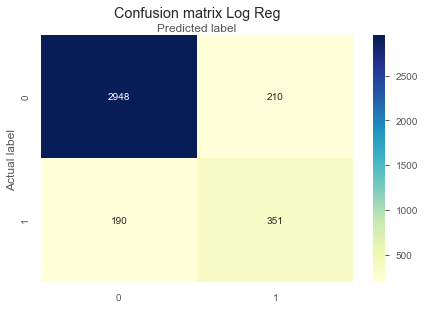

In [78]:
# Visualizing the Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LogR), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Log Reg', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

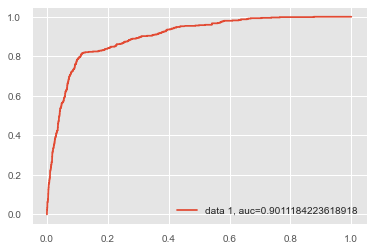

In [79]:
# ROC Curve
y_LR_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr_LR, tpr_LR, _ = metrics.roc_curve(y_test,  y_LR_pred_proba)
auc_LR = metrics.roc_auc_score(y_test, y_LR_pred_proba)
plt.plot(fpr_LR,tpr_LR,label="data 1, auc="+str(auc_LR))
plt.legend(loc=4)
plt.show()

In [80]:
print("Accuracy:",metrics.accuracy_score(y_test, y_LR_pred))
print("Precision:",metrics.precision_score(y_test, y_LR_pred))
print("Recall:",metrics.recall_score(y_test, y_LR_pred))
#Can use classification report to assess model adequacy, too
print(metrics.classification_report(y_test, y_LR_pred, labels=class_names))

Accuracy: 0.8918626655852934
Precision: 0.6256684491978609
Recall: 0.6487985212569316
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3158
           1       0.63      0.65      0.64       541

    accuracy                           0.89      3699
   macro avg       0.78      0.79      0.79      3699
weighted avg       0.89      0.89      0.89      3699



In [81]:
#90.3% accuracy 

In [82]:
# # Code for feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [83]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_test).sort_values(ascending=False)
# feature_imp

## K-Means Model

In [84]:
#important packages

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline

In [85]:
X_kmeans = np.array(X_train)
y_kmeans = np.array(y_train)

In [86]:
# Build the model

# load the model
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto') # 2 clusters, sale or no sale
kmeans.fit(X_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [87]:
# Predictions
correct = 0
for i in range(len(X_kmeans)):
    predict_me = np.array(X_kmeans[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y_kmeans[i]:
        correct += 1

print(correct/len(X_kmeans))

0.6933147955045765


### Ensemble_Learning

In [88]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
import xgboost as xgb


# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['xgb'] = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 100)
    models['tree'] = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
    models['svm'] = SVC(kernel='rbf',cache_size=7000,gamma= 'auto', C=5, probability =True, degree = 5)
    models['mlp'] = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,hidden_layer_sizes=(7,3), learning_rate='adaptive',learning_rate_init=0.01, max_iter=10000, momentum=0.9,nesterovs_momentum=True, power_t=0.5, random_state=1000,shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=True)
    models['bayes'] = GaussianNB()
    models['rforest'] =RandomForestClassifier(n_estimators=100)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
	scores = cross_val_score(model, X, y, scoring=['f1','roc_auc'], cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = X,y
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

NameError: name 'RepeatedKFold' is not defined

In [ ]:
# get a stacking ensemble of models
def get_stacking():
# define the base models
    level0 = list()  
    level0.append(('nn', MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,hidden_layer_sizes=(7,3), learning_rate='adaptive',learning_rate_init=0.01, max_iter=10000, momentum=0.9,nesterovs_momentum=True, power_t=0.5, random_state=1000,shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=True)))
    level0.append(('xgb', xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 100)))
    level0.append(('forest', RandomForestClassifier(n_estimators=100)))
    level0.append(('svm', SVC(kernel='rbf',cache_size=7000,gamma= 'auto', C=5, probability =True, degree = 5)))
    level0.append(('tree', DecisionTreeClassifier(criterion = "entropy", max_depth=3)))
    level0.append(('lr', LogisticRegression()))
    level0.append(('bayes', GaussianNB()))

# define meta learner model
    level1 = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 100)
# define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


In [ ]:
from sklearn.ensemble import StackingClassifier

# get a list of models to evaluate
def get_stacked_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['xgb'] = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 100)
    models['tree'] = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
    models['svm'] = SVC(kernel='rbf',cache_size=7000,gamma= 'auto', C=5, probability =True, degree = 5)
    models['mlp'] = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,hidden_layer_sizes=(7,3), learning_rate='adaptive',learning_rate_init=0.01, max_iter=10000, momentum=0.9,nesterovs_momentum=True, power_t=0.5, random_state=1000,shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=True)
    models['bayes'] = GaussianNB()
    models['rforest'] =RandomForestClassifier(n_estimators=100)
    models['stacking'] = get_stacking()
    return models


# # evaluate stacked given model using cross-validation
# def evaluate_model(model):
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# 	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# 	return scores

# define dataset
X, y = X,y
# get the models to evaluate
models_stacked = get_stacked_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models_stacked.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Top 3 models are xgb, nn, lr 